In [1]:
# in this notebook we see how to realign images
# this is often needed as telescope guidance is never perfect
# and a lot can occur that will displace the pointing:
# - some clouds come, guidance is lost, then reacquired
# - if we want to combine images taken from 2 different nights or more

# make figures interactive:
#%matplotlib notebook 
%matplotlib inline
# import library containing image reduction tools for this class
from image_reduction_tools import *
# packages for realignment:
import astroalign as aa
import numpy as np
from astropy.io import fits
import astropy.io.fits as io


In [2]:
# first lets look at the problem: we would like to RGB compose an image of M1:
# we want the longest exposures in Halpha, OIII and B:
files=glob.glob('../../data/photo/M1/p*f1.fits')
i=0
for file in files:
    print(i)
    print(file)
    print_header(file)
    i=i+1

0
../../data/photo/M1/p43952f1.fits
 Messier1 / B Cousins /  1200.18  s
1
../../data/photo/M1/p43950f1.fits
 Messier1 / R Cousins /  600.17  s
2
../../data/photo/M1/p43946f1.fits
 Messier1 / R Cousins /  30.16  s
3
../../data/photo/M1/p43954f1.fits
 Messier1 / O3 ohp 5007 /  1200.18  s
4
../../data/photo/M1/p43948f1.fits
 Messier1 / R Cousins /  5.17  s
5
../../data/photo/M1/p43953f1.fits
 Messier1 / H Alpha ohp 6565 /  1200.18  s
6
../../data/photo/M1/p43951f1.fits
 Messier1 / V Cousins /  600.18  s
7
../../data/photo/M1/p43947f1.fits
 Messier1 / V Cousins /  60.17  s
8
../../data/photo/M1/p43949f1.fits
 Messier1 / R Cousins /  60.17  s


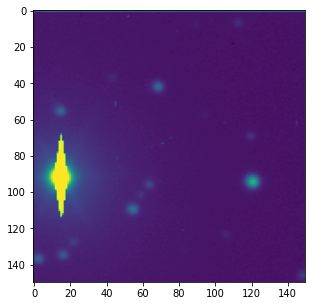

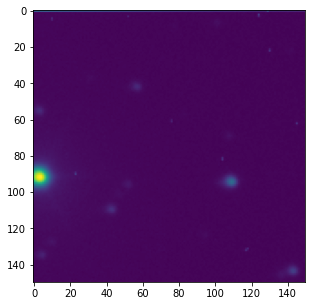

In [3]:
# so our files of interest (for M1) are 0, 3, and 5:
B_file=files[0]
OIII_file=files[3]
Ha_file=files[5]

# we could work with that but for clarity we will work in data/photo/M1/align
# and create 3 new files there (using cp in the terminal):
#B.fits    Ha.fits   OIII.fits

B_file="../../data/photo/M1/align/B.fits"
OIII_file="../../data/photo/M1/align/OIII.fits"
Ha_file="../../data/photo/M1/align/Ha.fits"


# we can easily see they are misaligned:
B=fits.getdata(B_file,ext=0)
OIII=fits.getdata(OIII_file,ext=0)

plt.figure(figsize=(5,5))
plt.imshow(np.log10(B[:150,:150]))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(np.log10(OIII[:150,:150]))
plt.show()



In [4]:
# generate the new filenames for the aligned images:
import os
# Split the filename into base and extension
base_OIII, extension = os.path.splitext(OIII_file)
base_Ha, extension = os.path.splitext(Ha_file)

# insert_align before the .fits
OIII_al_file=f"{base_OIII}_align{extension}"
Ha_al_file=f"{base_Ha}_align{extension}"
print(OIII_al_file)
print(Ha_al_file)


../../data/photo/M1/align/OIII_align.fits
../../data/photo/M1/align/Ha_align.fits


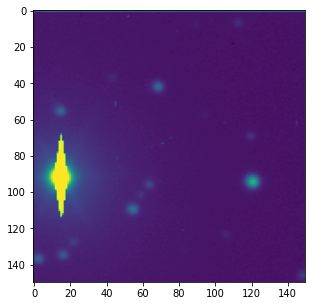

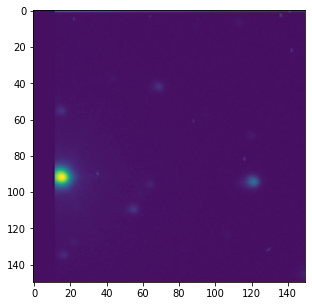

wrote  ../../data/photo/M1/align/OIII_align.fits
wrote  ../../data/photo/M1/align/Ha_align.fits


In [5]:
# now, lets do the 'registering', i.e. the action of 
# detecting stars and using them to find the offset between the images:
# align OIII trying to match B. OIII_al is the result.
OIII_al,footprint=aa.register(np.float32(OIII),np.float32(B))
# now lets look at OIII_al and B
plt.figure(figsize=(5,5))
plt.imshow(np.log10(B[:150,:150]))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(np.log10(OIII_al[:150,:150]))
plt.show()
# write the new aligned image
write_fits_image(OIII_al_file,OIII_al)

# lets do the same with the Halpha image just to be sure
Ha=fits.getdata(Ha_file,ext=0)
Ha_al,footprint=aa.register(np.float32(Ha),np.float32(B))
write_fits_image(Ha_al_file,Ha_al)


In [ ]:
# Nice, now its easy to compose a RGB image with ds9, outside of python

In [ ]:
from PIL import Image

In [ ]:
# Sample NxN numpy arrays (replace these with your actual arrays)
N = 256  # Replace with the size of your images
red_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
green_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
blue_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)

# Combine the three arrays into an RGB image
rgb_image_array = np.dstack((red_array, green_array, blue_array))

# Convert the numpy array to a Pillow Image
rgb_image = Image.fromarray(rgb_image_array)

# Save or display the RGB image
#rgb_image.save("rgb_image.png")  # Save as an image file
rgb_image.show()  # Dis

In [ ]:
# Combine the three arrays into an RGB image
rgb_image_array = np.dstack((B, OIII, Ha))

# Convert the numpy array to a Pillow Image
rgb_image = Image.fromarray(rgb_image_array)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Sample NxN numpy arrays (replace these with your actual data)
N = 256  # Replace with the size of your images
red_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
green_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
blue_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)

def update_rgb_image(r_scale=1.0, g_scale=1.0, b_scale=1.0):
    rgb_image = np.dstack((red_array * r_scale, green_array * g_scale, blue_array * b_scale))
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

interact(update_rgb_image, r_scale=(0.0, 2.0, 0.01), g_scale=(0.0, 2.0, 0.01), b_scale=(0.0, 2.0, 0.01))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Sample NxN numpy arrays (replace these with your actual data)
N = 256  # Replace with the size of your images
red_array = np.log10(Ha)#np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
green_array = np.log10(OIII)#np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
blue_array = np.log10(B)#np.random.randint(0, 256, size=(N, N), dtype=np.uint8)

plt.figure(figsize=(5,5))
def update_rgb_image(r_scale=1.0, g_scale=1.0, b_scale=1.0):
    rgb_image = np.dstack((red_array * r_scale, green_array * g_scale, blue_array * b_scale))
    plt.imshow(rgb_image)
    plt.axis('off')  # Hide the axis
    plt.show()

interact(update_rgb_image, r_scale=(0.0, 2.0, 0.01), g_scale=(0.0, 2.0, 0.01), b_scale=(0.0, 2.0, 0.01))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display, clear_output

# Sample NxN numpy arrays (replace these with your actual data)
N = 256  # Replace with the size of your images
red_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
green_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)
blue_array = np.random.randint(0, 256, size=(N, N), dtype=np.uint8)

def update_rgb_image(r_scale=1.0, g_scale=1.0, b_scale=1.0):
    rgb_image = np.dstack((red_array * r_scale, green_array * g_scale, blue_array * b_scale))
    
    # Display the image using IPython's display function
    clear_output(wait=True)
    display(plt.imshow(rgb_image))
    plt.axis('off')

interact(update_rgb_image, r_scale=(0.0, 2.0, 0.01), g_scale=(0.0, 2.0, 0.01), b_scale=(0.0, 2.0, 0.01))


In [ ]:
import ginga
from ginga.canvas.types import ginga_viewer

# Create a Ginga viewer
viewer = ginga_viewer.Viewer()

# Load and display an image
#image_path = 'path_to_your_image.fits'  # Replace with the path to your FITS image
viewer.load('../../data/photo/M1/p43946f1.fits')

# Start the Ginga event loop to display the image
viewer.mainloop()